# สร้าง Neural Network เพื่อจำแนกเครื่องแต่งกาย

The 10 classes are:

<ol start='0'>
<li> T-shirt/top
<li> Trouser
<li> Pullover
<li> Dress
<li> Coat
<li> Sandal
<li> Shirt
<li> Sneaker
<li> Bag
<li> Ankle boot
</ol>

In [1]:
%matplotlib inline

import time, datetime
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Data are also avaiable at https://github.com/zalandoresearch/fashion-mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Conv2D needs channel in dimensions
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

In [4]:
print('X_train shape: ', X_train.shape)
print(' X_test shape: ', X_test.shape)

X_train shape:  (60000, 28, 28, 1)
 X_test shape:  (10000, 28, 28, 1)


## View a Fashion Image

In [5]:
plt.rcParams['figure.figsize'] = (3, 3)

2 Pullover


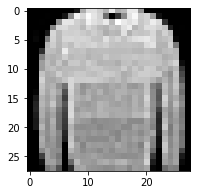

In [6]:
image_num = 20
print(y_test[image_num], class_names[y_test[image_num]])
plt.imshow(X_test[image_num], cmap='gray')

## Display Sample Images

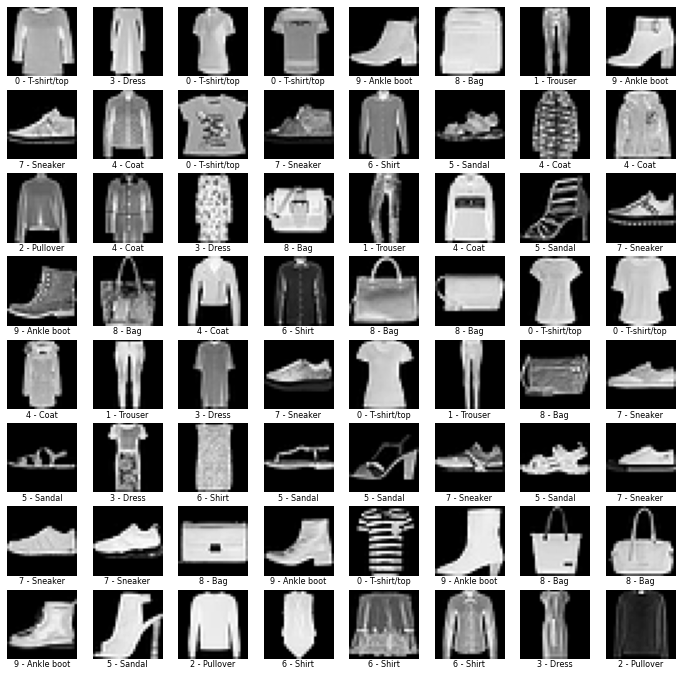

In [7]:
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

n_images = 64
indices = indices[:n_images]

sample_images = X_train[indices].reshape((-1, *X_train.shape[1:3]))
sample_labels = y_train[indices]

# Create 8x8 grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(12, 12))

# Loop through images and plot each one in a subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(f'{sample_labels[i]} - {class_names[sample_labels[i]]}', fontsize=8, y=-0.20)
    ax.axis('off')

plt.show()

## Normalize Images

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
print(f'X_train shape: {X_train.shape}')
print(f' X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28, 1)
 X_test shape: (10000, 28, 28, 1)


## One-Hot Encoding the Class Target Numbers (y)

In [10]:
from keras.utils import to_categorical

n_classes = len(class_names)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

## Build A Simple Model

In [24]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                27050     
                                                                 
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile the model
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
1875/1875 - 4s - loss: 0.4857 - accuracy: 0.8321 - val_loss: 0.4070 - val_accuracy: 0.8547 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.3590 - accuracy: 0.8749 - val_loss: 0.3577 - val_accuracy: 0.8762 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.3286 - accuracy: 0.8842 - val_loss: 0.3355 - val_accuracy: 0.8813 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.3047 - accuracy: 0.8947 - val_loss: 0.3213 - val_accuracy: 0.8844 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.2873 - accuracy: 0.8995 - val_loss: 0.3216 - val_accuracy: 0.8867 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.2738 - accuracy: 0.9041 - val_loss: 0.3045 - val_accuracy: 0.8900 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.2605 - accuracy: 0.9090 - val_loss: 0.3150 - val_accuracy: 0.8883 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2509 - accuracy: 0.9125 - val_loss: 0.2995 - val_accuracy: 0.8957 - 4s/epoch - 2ms/step
Epoch 9/

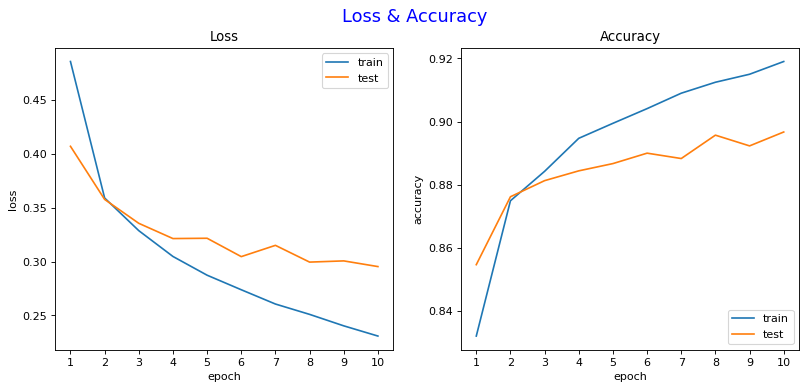

In [27]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(12, 5), dpi=80)
fig.suptitle('Loss & Accuracy', color='blue', fontsize=16)

x = range(1, len(history.history['loss'])+1)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(x, history.history['loss'])
ax.plot(x, history.history['val_loss'])
ax.set_title('Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(x, history.history['accuracy'])
ax.plot(x, history.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='lower right')

In [28]:
print('Train Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_train, y_train, verbose=0)))
print(' Test Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_test, y_test, verbose=0)))

Train Loss: 0.217922, Accuracy: 0.922883
 Test Loss: 0.295301, Accuracy: 0.896700


In [29]:
y_pred = model.predict(X_test, verbose=0)

y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)

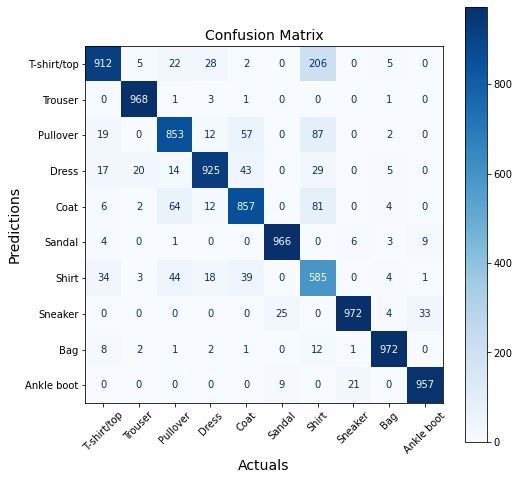

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test_1d, y_pred=y_pred_1d)

plt.rcParams.update({'font.size': 10})
disp = ConfusionMatrixDisplay(confusion_matrix=cm.T, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)    
plt.title('Confusion Matrix', fontsize=14)
plt.show()

0 T-shirt/top


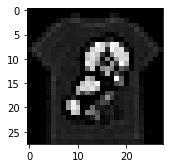

In [46]:
plt.rcParams['figure.figsize'] = (2.5, 2.5)
misclassified = np.where((y_test_1d==class_names.index('T-shirt/top')) & (y_pred_1d==class_names.index('Sandal')))[0]

image_num = misclassified[1]
print(y_test_1d[image_num], class_names[y_test_1d[image_num]])
plt.imshow(X_test[image_num], cmap='gray')